In [1]:
import pandas as pd
import re

%matplotlib inline

In [60]:
df = pd.read_csv("data/questions.csv", delimiter='\t', nrows=1000)

# More info for this powerful method https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [61]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


### Create two columns (one for each question) with the normalized text.

In [62]:
# Suggestion, start from this function

def normalize(df):
    text = ?
    pattern = re.compile('[\W]+', re.UNICODE) # \W Matches any character which is not a word character.
    pattern.sub(r' ', text.lower()).strip()
    
    return ?

SyntaxError: invalid syntax (<ipython-input-62-3c46bcd990e1>, line 4)

In [63]:

import spacy
nlp = spacy.load('en_core_web_lg')


def dostuff():
    docs = []
    for doc in nlp.pipe(df['question1'].values, batch_size=50, n_threads=4):
        docs.append((doc,))
    df["spacy_q1"] = docs

    docs = []

    for doc in nlp.pipe(df['question2'].values, batch_size=50, n_threads=4):
        docs.append((doc,))
    df["spacy_q2"] = docs
    
    
%time dostuff()

CPU times: user 17.9 s, sys: 243 ms, total: 18.1 s
Wall time: 4.59 s


In [64]:
df.head()

def lower(doc):
    doc = doc[0]
    return ' '.join(w.lower_ for w in doc)
    

df["normalized_q1"] = df['spacy_q1'].apply(lower)
df["normalized_q2"] = df['spacy_q2'].apply(lower)
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,spacy_q1,spacy_q2,normalized_q1,normalized_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"((What, is, the, step, by, step, guide, to, in...","((What, is, the, step, by, step, guide, to, in...",what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"((What, is, the, story, of, Kohinoor, (, Koh, ...","((What, would, happen, if, the, Indian, govern...",what is the story of kohinoor ( koh - i - noor...,what would happen if the indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"((How, can, I, increase, the, speed, of, my, i...","((How, can, Internet, speed, be, increased, by...",how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"((Why, am, I, mentally, very, lonely, ?, How, ...","((Find, the, remainder, when, [, math]23^{24}[...",why am i mentally very lonely ? how can i solv...,find the remainder when [ math]23^{24}[/math ]...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"((Which, one, dissolve, in, water, quikly, sug...","((Which, fish, would, survive, in, salt, water...","which one dissolve in water quikly sugar , sal...",which fish would survive in salt water ?


### Create two columns (one for each question) with the length of each question and plot the two distribution.

In [65]:
df.loc[:,"length_q1"] = df['normalized_q1'].apply(lambda x: len(x.split(" ")))
df.loc[:,"length_q2"] = df['normalized_q2'].apply(lambda x: len(x.split(" ")))

In [66]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,spacy_q1,spacy_q2,normalized_q1,normalized_q2,length_q1,length_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"((What, is, the, step, by, step, guide, to, in...","((What, is, the, step, by, step, guide, to, in...",what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,15,13
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"((What, is, the, story, of, Kohinoor, (, Koh, ...","((What, would, happen, if, the, Indian, govern...",what is the story of kohinoor ( koh - i - noor...,what would happen if the indian government sto...,15,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"((How, can, I, increase, the, speed, of, my, i...","((How, can, Internet, speed, be, increased, by...",how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,15,11
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"((Why, am, I, mentally, very, lonely, ?, How, ...","((Find, the, remainder, when, [, math]23^{24}[...",why am i mentally very lonely ? how can i solv...,find the remainder when [ math]23^{24}[/math ]...,13,12
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"((Which, one, dissolve, in, water, quikly, sug...","((Which, fish, would, survive, in, salt, water...","which one dissolve in water quikly sugar , sal...",which fish would survive in salt water ?,16,8


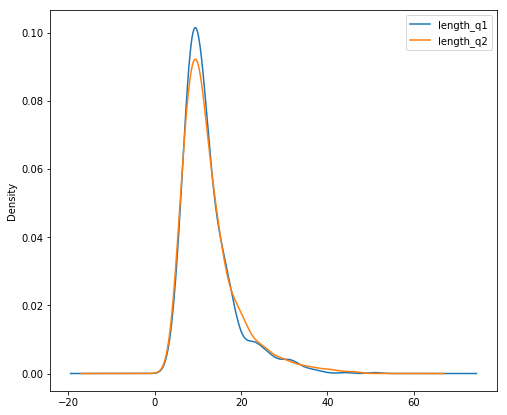

In [67]:
df[['length_q1','length_q2']].plot(figsize=[8,7], kind='kde')

### Can we use the length of the questions as a feature?
### Plot the length distributions for duplicate and not duplicate pair of questions and compute the correlation

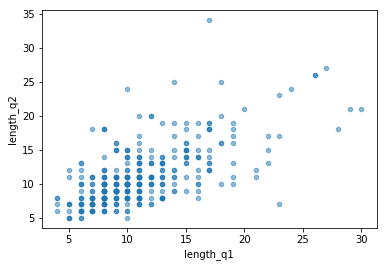

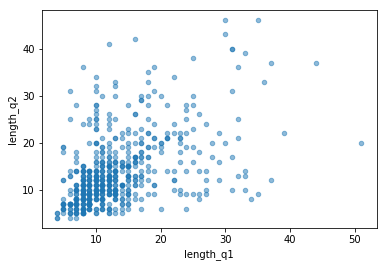

In [68]:
df[df['is_duplicate'] == 1][['length_q1','length_q2']].plot(kind='scatter',x='length_q1',y='length_q2',alpha=0.5)
df[df['is_duplicate'] == 0][['length_q1','length_q2']].plot(kind='scatter',x='length_q1',y='length_q2', alpha=0.5)

In [69]:
df[df['is_duplicate'] == 1][['length_q1','length_q2']].corr('pearson')

,length_q1,length_q2
length_q1,1.000000,0.648566
length_q2,0.648566,1.000000


### Compute the number of words they have in common


In [70]:
def common_words(df):
    q1 = df['normalized_q1'].split(" ")
    q2 = df['normalized_q2'].split(" ")
    return len(set(q1)&set(q2))

In [71]:
df.loc[:,'common_words'] = df.apply(common_words, axis=1)

In [72]:
df.loc[:,'percentage'] = df['common_words'] * 100 / (df['length_q1'] + df['length_q2'])

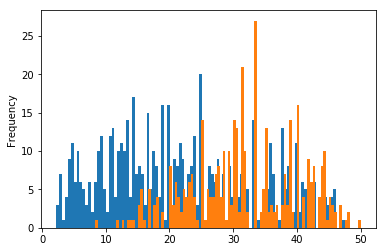

In [73]:
df[df['is_duplicate'] == 0]['percentage'].plot(kind='hist', bins=100)
df[df['is_duplicate'] == 1]['percentage'].plot(kind='hist', bins=100)

### Compute the number of duplicate questions and plot an hist

Suggestion: think about groupby

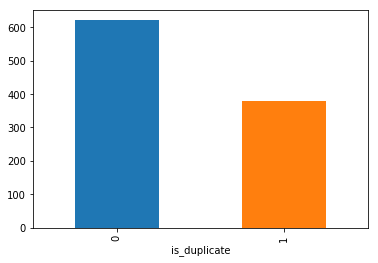

In [74]:
df.groupby('is_duplicate').size().plot(kind='bar')

In [75]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,spacy_q1,spacy_q2,normalized_q1,normalized_q2,length_q1,length_q2,common_words,percentage
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"((What, is, the, step, by, step, guide, to, in...","((What, is, the, step, by, step, guide, to, in...",what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,15,13,12,42.857143
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"((What, is, the, story, of, Kohinoor, (, Koh, ...","((What, would, happen, if, the, Indian, govern...",what is the story of kohinoor ( koh - i - noor...,what would happen if the indian government sto...,15,20,11,31.428571
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"((How, can, I, increase, the, speed, of, my, i...","((How, can, Internet, speed, be, increased, by...",how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,15,11,5,19.230769
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"((Why, am, I, mentally, very, lonely, ?, How, ...","((Find, the, remainder, when, [, math]23^{24}[...",why am i mentally very lonely ? how can i solv...,find the remainder when [ math]23^{24}[/math ]...,13,12,1,4.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"((Which, one, dissolve, in, water, quikly, sug...","((Which, fish, would, survive, in, salt, water...","which one dissolve in water quikly sugar , sal...",which fish would survive in salt water ?,16,8,5,20.833333


In [76]:
def cosine_sim(df):
    q1 = df['spacy_q1'][0]
    q2 = df['spacy_q2'] [0]
    return q1.similarity(q2)

In [77]:
df.loc[:,'f_word_emb_similarity'] = df.apply(cosine_sim, axis=1)
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,spacy_q1,spacy_q2,normalized_q1,normalized_q2,length_q1,length_q2,common_words,percentage,f_word_emb_similarity
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"((What, is, the, step, by, step, guide, to, in...","((What, is, the, step, by, step, guide, to, in...",what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,15,13,12,42.857143,0.986684
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"((What, is, the, story, of, Kohinoor, (, Koh, ...","((What, would, happen, if, the, Indian, govern...",what is the story of kohinoor ( koh - i - noor...,what would happen if the indian government sto...,15,20,11,31.428571,0.924999
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"((How, can, I, increase, the, speed, of, my, i...","((How, can, Internet, speed, be, increased, by...",how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,15,11,5,19.230769,0.929068
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"((Why, am, I, mentally, very, lonely, ?, How, ...","((Find, the, remainder, when, [, math]23^{24}[...",why am i mentally very lonely ? how can i solv...,find the remainder when [ math]23^{24}[/math ]...,13,12,1,4.000000,0.730742
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"((Which, one, dissolve, in, water, quikly, sug...","((Which, fish, would, survive, in, salt, water...","which one dissolve in water quikly sugar , sal...",which fish would survive in salt water ?,16,8,5,20.833333,0.846616


In [78]:
def ov_chunks(df):
    q1 = df['spacy_q1'][0]
    q2 = df['spacy_q2'] [0]
    
    return len(set(w.text for w in q1.noun_chunks)&set(w.text for w in q2.noun_chunks))


In [79]:
df.loc[:,'f_ov_chunks'] = df.apply(ov_chunks, axis=1)
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,spacy_q1,spacy_q2,normalized_q1,normalized_q2,length_q1,length_q2,common_words,percentage,f_word_emb_similarity,f_ov_chunks
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"((What, is, the, step, by, step, guide, to, in...","((What, is, the, step, by, step, guide, to, in...",what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,15,13,12,42.857143,0.986684,4
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"((What, is, the, story, of, Kohinoor, (, Koh, ...","((What, would, happen, if, the, Indian, govern...",what is the story of kohinoor ( koh - i - noor...,what would happen if the indian government sto...,15,20,11,31.428571,0.924999,1
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"((How, can, I, increase, the, speed, of, my, i...","((How, can, Internet, speed, be, increased, by...",how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,15,11,5,19.230769,0.929068,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"((Why, am, I, mentally, very, lonely, ?, How, ...","((Find, the, remainder, when, [, math]23^{24}[...",why am i mentally very lonely ? how can i solv...,find the remainder when [ math]23^{24}[/math ]...,13,12,1,4.000000,0.730742,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"((Which, one, dissolve, in, water, quikly, sug...","((Which, fish, would, survive, in, salt, water...","which one dissolve in water quikly sugar , sal...",which fish would survive in salt water ?,16,8,5,20.833333,0.846616,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
df = df.rename(columns={'length_q1':'f_length_q1','length_q2':'f_length_q2','common_words':'f_common_words','percentage':'f_percentage'})

feat = [f for f in df.columns if f.startswith('f_')]
target = df['is_duplicate']

In [82]:
df_X_train, df_X_test, df_y_train, df_y_test = \
    train_test_split(df[feat], target, test_size=0.2, random_state=42, stratify=target)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
mdl = LogisticRegression()

In [85]:
mdl.fit(df_X_train, df_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
pred = mdl.predict(df_X_test)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, df_y_test)

0.72

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
mdl = AdaBoostClassifier()
mdl.fit(df_X_train, df_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [90]:
pred = mdl.predict(df_X_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, df_y_test)

0.69

In [92]:
dict(zip(feat, mdl.feature_importances_))

{'f_common_words': 0.1,
 'f_length_q1': 0.04,
 'f_length_q2': 0.18,
 'f_ov_chunks': 0.02,
 'f_percentage': 0.26,
 'f_word_emb_similarity': 0.4}